In [1]:
%matplotlib inline
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

plt.style.use('ggplot')

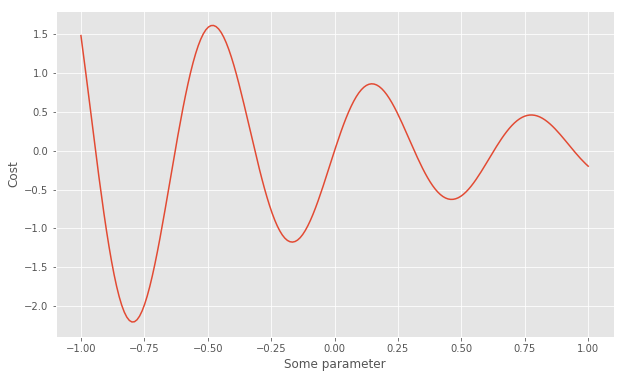

In [2]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1 , 200)
hz =10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some parameter')

In [3]:
gradient = np.diff(cost)

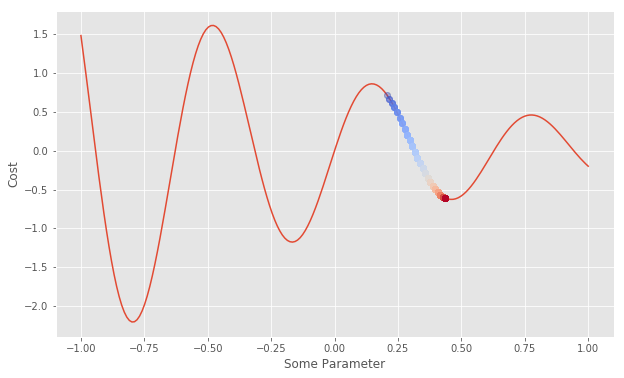

In [4]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x) * np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')
n_iterations = 500
cmap = plt.get_cmap('coolwarm')
c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
init_p =120 #np.radom.randint(len(x)*0.2, len(x)*0.8)
learning_rate = 1.0
for iter_i in range(n_iterations):
    init_p -= learning_rate *gradient[int(init_p)]
    ax.plot(x[int(init_p)], cost[int(init_p)],'ro',alpha=(iter_i+1)/n_iterations, color=scalar_map.to_rgba(iter_i))

In [5]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

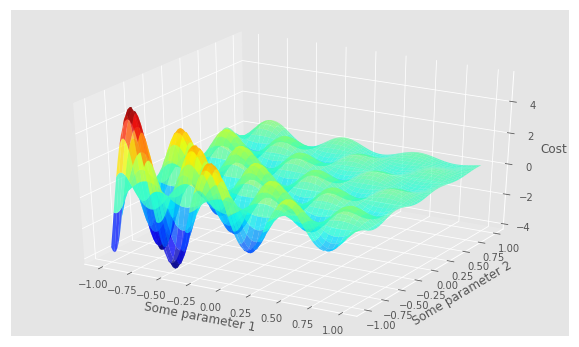

In [6]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')
x, y = np.mgrid[-1:1:0.02, -1:1:0.02]
X, Y, Z = x, y, np.sin(hz*x)*np.exp(-x)*np.cos(hz*y)*np.exp(-y)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.75, cmap='jet', shade=False)
ax.set_xlabel('Some parameter 1')
ax.set_ylabel('Some parameter 2')
ax.set_zlabel('Cost')

In [7]:
np.mgrid[0:2,0:3]

array([[[0, 0, 0],
        [1, 1, 1]],

       [[0, 1, 2],
        [0, 1, 2]]])

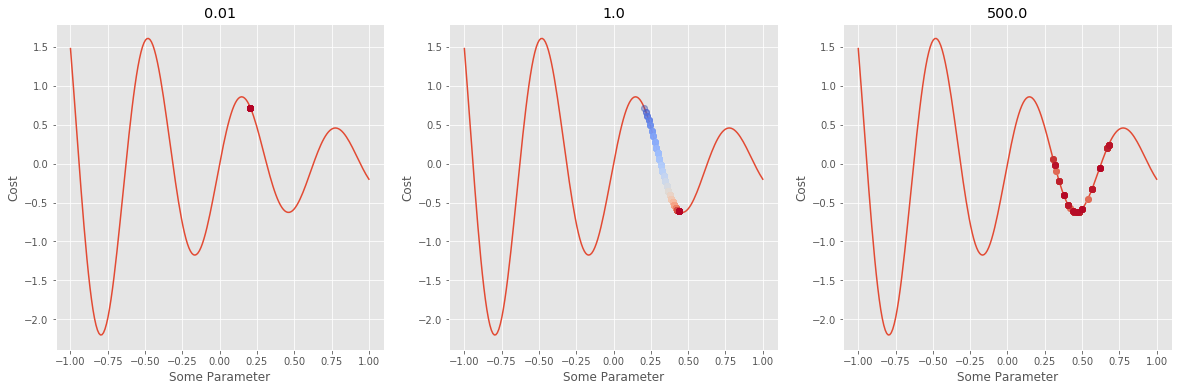

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
for rate_i, learning_rate in enumerate([0.01, 1.0, 500.]):
    ax = axs[rate_i]
    x = np.linspace(-1,1, 200)
    hz = 10
    cost = np.sin(hz*x)*np.exp(-x)
    ax.plot(x, cost)
    ax.set_ylabel('Cost')
    ax.set_xlabel('Some Parameter')
    ax.set_title(str(learning_rate))
    n_iterations = 500
    cmap = plt.get_cmap('coolwarm')
    c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
    scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
    init_p = 120
    for iter_i in range(n_iterations):
        init_p -= learning_rate * gradient[int(init_p)]
        ax.plot(x[int(init_p)], cost[int(init_p)], 'ro', alpha = (iter_i+1)/ n_iterations, color = scalar_map.to_rgba(iter_i))

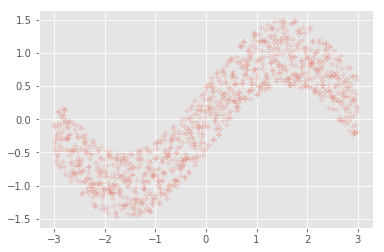

In [9]:
n_observations = 1000

xs = np.linspace(-3, 3, n_observations)

ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha=0.15, marker='+')

In [10]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

(array([   7.,   25.,   95.,  154.,  299.,  248.,  124.,   38.,    9.,    1.]),
 array([-3.39581871, -2.68600564, -1.97619257, -1.2663795 , -0.55656643,
         0.15324664,  0.86305971,  1.57287278,  2.28268585,  2.99249892,
         3.70231199]),
 <a list of 10 Patch objects>)

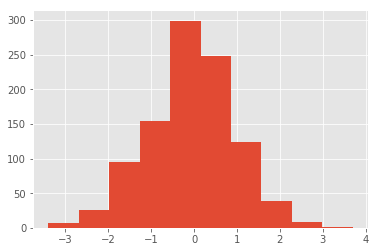

In [11]:
sess = tf.InteractiveSession()
n = tf.random_normal([1000],mean = 0, stddev=1.0, dtype=tf.float32).eval()
plt.hist(n)

(array([   2.,    2.,   23.,  102.,  243.,  297.,  227.,   86.,   15.,    3.]),
 array([-0.43056184, -0.35117658, -0.27179132, -0.19240606, -0.1130208 ,
        -0.03363554,  0.04574972,  0.12513498,  0.20452024,  0.2839055 ,
         0.36329076]),
 <a list of 10 Patch objects>)

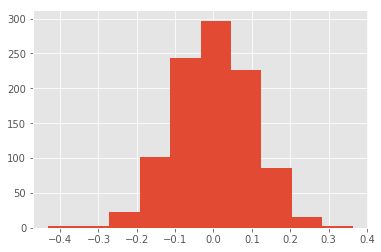

In [12]:
n = tf.random_normal([1000], stddev=0.1).eval()
plt.hist(n)

In [13]:
W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1, name='weight'))
B = tf.Variable(tf.constant([0],dtype=tf.float32), name='bias')

Y_pred = X*W + B

In [14]:
def distance(p1, p2):
    return tf.abs(p1-p2)

In [15]:
cost = tf.reduce_mean(distance(Y_pred, Y))

In [16]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0.431117
0.415374
0.407845
0.404744
0.403227
0.402625
0.402454
0.402378
0.402343
0.402329
0.402319
0.402311
0.402308


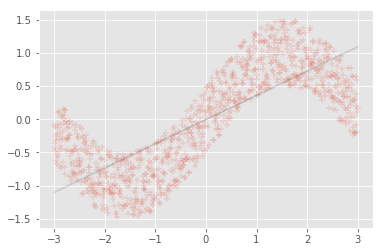

In [17]:
# We create a session to use the graph
n_iterations = 5000

# Plot the true data distribution
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
with tf.Session() as sess:
    # Herexx we tell tensorflow thaXt we want to initialize all
    # the variables in the graph so we can use them
    # This will set `W` and `b` to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        sess.run(optimizer, feed_dict={X: xs, Y: ys})
        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        # every 10 iterations
        if it_i % 10 == 0:
            # let's plot the x versus the predicted y
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)

            # We'll draw points as a scatter plot just like before
            # Except we'll also scale the alpha value so that it gets
            # darker as the iterations get closer to the end
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            fig.show()
            plt.draw()

            # And let's print our training cost: mean of absolute differences
            print(training_cost)

        # Allow the training to quit if we've reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.00000001:
            break

        # Keep track of the training cost
        prev_training_cost = training_cost

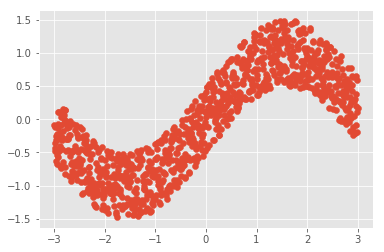

In [18]:
plt.scatter(xs, ys)

In [19]:
idxs = np.arange(100)
batch_size = 10
n_batches = len(idxs) // batch_size
for batch_i in range(n_batches):
    print(idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


In [20]:
rand_idxs = np.random.permutation(idxs)
batch_size = 10
n_batches = len(rand_idxs)//batch_size
for batch_i in range(n_batches):
    print(rand_idxs[batch_i * batch_size : (batch_i + 1) * batch_size] )

[39 20  4 62 27 36 78 75 18 88]
[66 52 11  5 61 83 90 14 59 98]
[30 25 95 28 49 67  7 96 10 65]
[37  6 58 48 40 34 72 80 13 50]
[24 54 74 69 17 26  8 63 85 21]
[ 0 86  1 76 56 84 12 89 41 57]
[33 64 29 19 46 16 53 60 77 93]
[44 35 51 31 45 91 70 92 94 42]
[15 97 79 68  3 38 73 99 22 87]
[23 82  9  2 47 32 43 71 55 81]


Instructions for updating:
Use `tf.global_variables_initializer` instead.
0.659642
0.520742
0.453664
0.424953
0.412413
0.406699
0.404166
0.40294
0.402561
0.402426
0.402363
0.402339
0.402325
0.402317
0.40231
0.402308
0.402308
0.402308
0.402308
0.402308
0.402307
0.402307
0.402307
0.402307
0.402307
0.402307
0.402307
0.402306
0.402306
0.402306
0.402306
0.402306
0.402306
0.402306
0.402305
0.402305
0.402305
0.402305
0.402305
0.402305
0.402305
0.402305
0.402305
0.402305
0.402305
0.402305
0.402305
0.402305
0.402305
0.402305


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


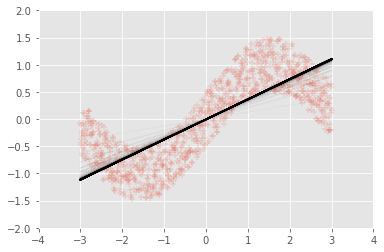

In [21]:
n_iterations = 500
batch_size = 1000
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha =0.15, marker='+')
ax.set_xlim([-4, 4])
ax.set_ylim([-2, 2])

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    
    prev_training_cost = 0.
    
    for it_i in range(n_iterations):
        rand_idxs = np.random.permutation(range(len(xs)))
        n_batches = len(rand_idxs) // batch_size
        for batch_i in range(n_batches):
            
            rand_idx = rand_idxs[batch_i*batch_size : (batch_i+1)*batch_size]
            batch_x = xs[rand_idx]
            batch_y = ys[rand_idx]
            sess.run(optimizer, feed_dict={X:batch_x, Y: batch_y})
            

        if it_i %10 == 0:
            
            ys_pred = Y_pred.eval(feed_dict={X:xs },session=sess)
            training_cost = sess.run(cost, feed_dict={X:xs,Y:ys})
            
            ax.plot(xs, ys_pred, 'k', alpha=it_i/n_iterations)
            print(training_cost)
fig.show()
plt.draw()

In [22]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [23]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [24]:
def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    cost = tf.reduce_mean(distance(Y_pred, Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax =plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha=0.15, marker='+')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    
    cmap = plt.get_cmap('coolwarm')
    c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
    scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
    
    with tf.Session() as sess:
        
        sess.run(tf.global_variables_initializer())
        prev_trainig_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs)// batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})
                
            if it_i%10 : 
                ys_pred = Y_pred.eval(feed_dict={X:xs},session = sess)
                training_cost = sess.run(cost, feed_dict={X:xs, Y:ys})
                
                ax.plot(xs,ys_pred, alpha=it_i/n_iterations, color=scalar_map.to_rgba(it_i))
                print(training_cost)
        fig.show()
        plt.draw()

In [25]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

n_neurons = 100
W = tf.Variable(tf.random_normal([1, n_neurons], stddev=0.1))

b= tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]))

h = tf.matmul(tf.expand_dims(X,1),W) + b
Y_pred = tf.reduce_sum(h, 1)

cost = tf.reduce_mean(distance(Y_pred, Y))

0.406762
0.407456
0.402322
0.403053
0.402791
0.403464
0.403177
0.405735
0.402858
0.402563
0.404328
0.406498
0.405207
0.404787
0.402511
0.402778
0.402473
0.403552
0.402515
0.403075
0.406779
0.403875
0.403174
0.40321
0.402491
0.402635
0.405191
0.402306
0.403184
0.405304
0.402689
0.402896
0.403497
0.402347
0.402622
0.40268
0.402656
0.40258
0.402375
0.402743
0.402376
0.402867
0.402762
0.402434
0.402332
0.402443
0.402541
0.402317
0.404456
0.402763
0.403685
0.402679
0.402616
0.402901
0.402584
0.402893
0.404678
0.403622
0.402533
0.402356
0.403605
0.403144
0.403716
0.402902
0.406552
0.402621
0.402918
0.402451
0.407078
0.402419
0.402453
0.402415
0.402635
0.404062
0.402325
0.402309
0.403061
0.403958
0.402944
0.402716
0.403401
0.403657
0.402716
0.402445
0.403143
0.402806
0.404799
0.402333
0.402677
0.402644
0.403914
0.402668
0.402318
0.402414
0.402904
0.40246
0.402343
0.402308
0.404956
0.403897
0.403151
0.403141
0.403514
0.403888
0.403067
0.402633
0.402605
0.404581
0.402891
0.402545
0.404841
0.402

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


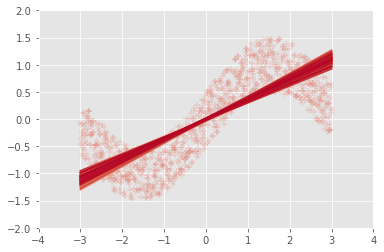

In [26]:
train(X,Y,Y_pred,n_iterations=500,learning_rate=0.002)

0.895775
0.895143
0.853772
0.843986
0.882864
0.833539
0.843043
0.815768
0.825852
0.781757
0.846113
0.814042
0.758394
0.758902
0.75121
0.786726
0.734955
0.754318
0.776351
0.746118
0.703557
0.69188
0.698226
0.698152
0.720362
0.670582
0.664199
0.690255
0.652367
0.651647
0.666446
0.633641
0.632696
0.628607
0.659199
0.618487
0.609671
0.623534
0.622432
0.648181
0.590769
0.630006
0.580933
0.576281
0.584304
0.576455
0.618309
0.594442
0.551771
0.614546
0.547196
0.597428
0.552522
0.59438
0.642738
0.536576
0.546593
0.519998
0.517867
0.566212
0.509727
0.565674
0.53775
0.512419
0.492318
0.488069
0.498863
0.570221
0.505595
0.538227
0.472598
0.54839
0.532424
0.488225
0.477178
0.45515
0.479692
0.48328
0.521706
0.448302
0.470175
0.445003
0.508165
0.435991
0.489426
0.44401
0.476458
0.433523
0.436195
0.492564
0.455854
0.468845
0.461611
0.406715
0.483757
0.486906
0.405586
0.499106
0.398842
0.447606
0.394765
0.390473
0.473924
0.443447
0.388079
0.463112
0.386859
0.437058
0.399795
0.449286
0.443588
0.409989


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


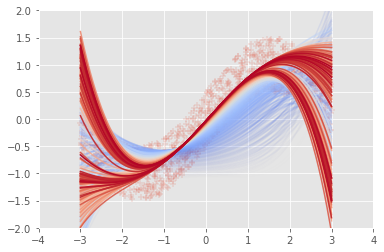

In [27]:
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(0, 5):
    W = tf.Variable(
            tf.random_normal([1], stddev=0.1), name='weight_%d'%pow_i)
    Y_pred = tf.add(tf.mul(tf.pow(X, pow_i), W), Y_pred)
    
train(X, Y, Y_pred, n_iterations=500, learning_rate=0.002)

polynomial expansion is not useful

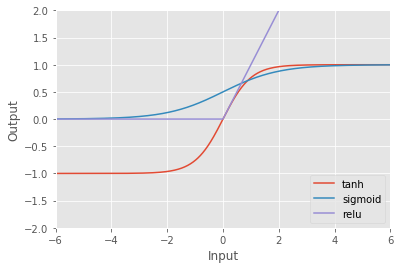

In [28]:
sess = tf.InteractiveSession()
x = np.linspace(-6, 6, 1000)

plt.plot(x, tf.nn.tanh(x).eval(), label='tanh')
plt.plot(x, tf.nn.sigmoid(x).eval(),label='sigmoid')
plt.plot(x, tf.nn.relu(x).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6, 6])
plt.ylim([-2, 2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')

0.580532
0.455885
0.35691
0.302991
0.283488
0.276129
0.272981
0.271395
0.270661
0.27017
0.269974
0.269808
0.269657
0.269532
0.269398
0.269296
0.269202
0.269114
0.268948
0.268871
0.26879
0.268716
0.268646
0.268574
0.268506
0.268428
0.268359
0.268214
0.268145
0.268072
0.267999
0.267934
0.267871
0.267814
0.267732
0.267666
0.26752
0.26746
0.267393
0.267337
0.267268
0.2672
0.267138
0.267077
0.267018
0.266898
0.266843
0.266782
0.266743
0.266676
0.266614
0.266557
0.266507
0.266446
0.266339
0.266286
0.266224
0.266169
0.266114
0.266058
0.266002
0.265946
0.265891
0.265779
0.265726
0.26567
0.265617
0.265564
0.265506
0.265452
0.265402
0.265347
0.26525
0.265191
0.265134
0.265084
0.265028
0.264982
0.264925
0.26487
0.264821
0.264744
0.264675
0.26462
0.264569
0.264515
0.264465
0.264415
0.264366
0.264315


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


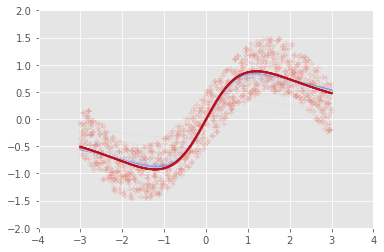

In [29]:
n_neurons = 10
W = tf.Variable(tf.random_normal([1, n_neurons]), name='W')
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]), name='b')

h = tf.nn.tanh(tf.matmul(tf.expand_dims(X,1), W) +b , name= 'h')

Y_pred = tf.reduce_sum(h, 1)

train(X, Y, Y_pred)

In [30]:
def linear(X, n_input, n_output, activation=None):
    W = tf.Variable(tf.random_normal([n_input, n_output], stddev=0.1), name= 'weight')
    b = tf.Variable(tf.constant(0, dtype=tf.float32, shape = [n_output]), name='b')
    h = tf.nn.tanh(tf.matmul(X, W) + b, name='h')
    return h

In [31]:
from pprint import pprint

In [32]:
from tensorflow.python.framework import ops

ops.reset_default_graph()

g = tf.get_default_graph()

print([op.name for op in tf.get_default_graph().get_operations()])

X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10)

print([op.name for op in tf.get_default_graph().get_operations()])

[]
['X', 'random_normal/shape', 'random_normal/mean', 'random_normal/stddev', 'random_normal/RandomStandardNormal', 'random_normal/mul', 'random_normal', 'weight', 'weight/Assign', 'weight/read', 'Const', 'b', 'b/Assign', 'b/read', 'MatMul', 'add', 'h']


In [33]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
                name='W',
                shape=[n_input, n_output],
                initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        
        b = tf.get_variable(
                name='b',
                shape=[n_output],
                initializer=tf.constant_initializer())
        h = tf.add(tf.matmul(X,W), b)
        if activation is not None:
            h = activation(h)
        return h

In [34]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

g = tf.get_default_graph()

print([op.name for op in tf.get_default_graph().get_operations()])

X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10, scope='layer1')

pprint([op.name for op in tf.get_default_graph().get_operations()])

[]
['X',
 'layer1/W',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b',
 'layer1/b/Initializer/Const',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/Add']


In [35]:
h2 = linear(h, 10, 10, scope='layer2')
h3 = linear(h2, 10, 3, scope='layer3')
pprint([op.name for op in tf.get_default_graph().get_operations()])

['X',
 'layer1/W',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b',
 'layer1/b/Initializer/Const',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/Add',
 'layer2/W',
 'layer2/W/Initializer/random_normal/shape',
 'layer2/W/Initializer/random_normal/mean',
 'layer2/W/Initializer/random_normal/stddev',
 'layer2/W/Initializer/random_normal/RandomStandardNormal',
 'layer2/W/Initializer/random_normal/mul',
 'layer2/W/Initializer/random_normal',
 'layer2/W/Assign',
 'layer2/W/read',
 'layer2/b',
 'layer2/b/Initializer/Const',
 'layer2/b/Assign',
 'layer2/b/read',
 'layer2/MatMul',
 'layer2/Add',
 'layer3/W',
 'layer3/W/Initializer/random_normal/shape',
 'layer3/W/Initializer/random_normal/mean',
 'laye

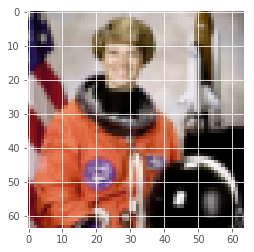

In [36]:
from skimage.data import astronaut
from scipy.misc import imresize
img = imresize(astronaut(), (64,64))
plt.imshow(img)

In [37]:
xs =[]

ys =[]

for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        xs.append([row_i, col_i])
        ys.append(img[row_i, col_i])
xs = np.array(xs)
ys = np.array(ys)

xs = (xs - np.mean(xs)) / np.std(xs)
print(xs.shape, ys.shape)

(4096, 2) (4096, 3)


In [ ]:
plt.imshow(ys.reshape(img.shape))

In [39]:
X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 3], name='Y')

In [40]:
n_neurons = [2, 64, 64, 64, 64, 64, 64 ,3]

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = linear(current_input, 
                           n_input=n_neurons[layer_i-1],
                           n_output=n_neurons[layer_i],
                           activation=tf.nn.relu if (layer_i+1) <len(n_neurons) else None,
                           scope='layer_'+str(layer_i)
                          )
Y_pred = current_input

In [42]:
cost = tf.reduce_mean(tf.reduce_sum(distance(Y_pred, Y), 1))

In [43]:
optimizer = tf.train.AdadeltaOptimizer(0.001).minimize(cost)

0 343.614
1 343.343
2 343.052
3 342.724
4 342.334
5 341.836
6 341.143
7 340.039
8 337.652
9 326.532
10 165.594
11 157.522
12 154.028
13 150.813
14 148.21
15 146.226
16 144.477
17 143.342
18 142.943
19 139.669


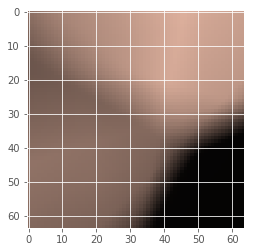

20 147.192
21 135.84
22 134.892
23 138.652
24 142.348
25 133.107
26 138.204
27 134.905
28 132.041
29 141.487
30 143.396
31 128.598
32 126.589
33 126.135
34 133.811
35 133.299
36 133.293
37 119.721
38 128.932
39 123.136


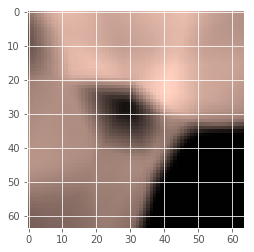

40 127.965
41 122.978
42 127.269
43 138.1
44 116.569
45 127.987
46 115.814
47 124.417
48 116.058
49 115.523
50 122.773
51 111.637
52 114.75
53 110.592
54 114.512
55 107.23
56 98.4757
57 97.6049
58 96.0767
59 106.32


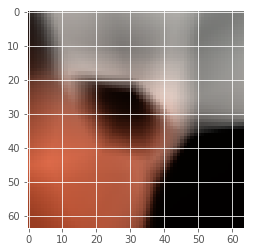

60 99.4267
61 118.817
62 99.764
63 93.8788
64 95.5077
65 97.5905
66 92.8409
67 101.069
68 95.9299
69 98.7758
70 91.7396
71 91.4324
72 97.2889
73 93.3644
74 90.7505
75 94.101
76 91.9309
77 91.8953
78 92.0882
79 90.1008


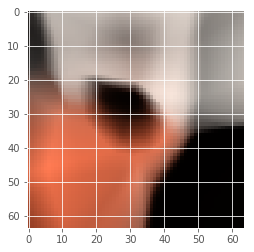

80 93.8691
81 88.9689
82 88.7674
83 97.4773
84 87.3969
85 90.953
86 92.3137
87 89.6939
88 87.3936
89 87.5518
90 93.0413
91 87.7154
92 84.9968
93 98.1164
94 92.5067
95 86.8571
96 86.3161
97 93.9304
98 85.215
99 81.7895


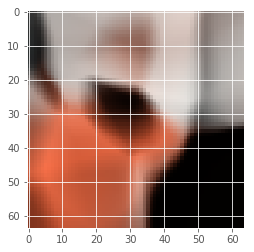

100 88.105
101 82.4177
102 86.2271
103 82.8473
104 87.6167
105 81.2755
106 78.9774
107 84.6816
108 89.9982
109 78.0018
110 84.8389
111 83.317
112 80.4184
113 98.6509
114 85.2387
115 86.0037
116 75.8414
117 77.1255
118 77.7985
119 79.7949


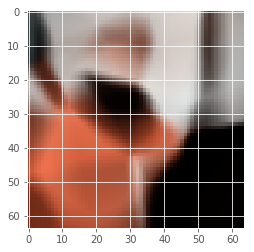

120 77.5921
121 75.9079
122 85.3521
123 88.4864
124 81.9749
125 74.8443
126 83.4833
127 74.0371
128 90.8269
129 75.1095
130 78.0964
131 84.9987
132 76.4447
133 82.456
134 81.0201
135 92.0258
136 74.3976
137 81.8474
138 74.9592
139 72.0329


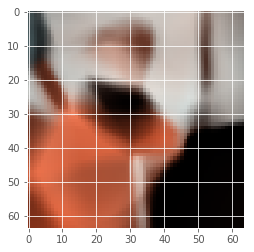

140 76.4786
141 81.9962
142 74.7084
143 74.6569
144 71.9044
145 74.1245
146 72.8672
147 75.0178
148 77.6724
149 71.2831
150 71.9059
151 73.3249
152 72.6655
153 76.4299
154 77.8588
155 72.4385
156 72.6368
157 71.846
158 68.8582
159 67.3864


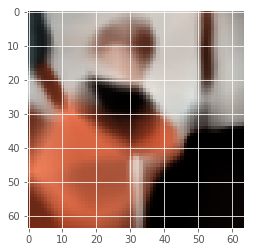

160 72.547
161 69.5932
162 70.8945
163 74.1063
164 70.3724
165 73.166
166 69.282
167 73.5046
168 67.0836
169 68.4854
170 71.5582
171 75.7338
172 70.3028
173 67.3313
174 75.8126
175 65.3039
176 69.5832
177 68.6522
178 67.5031
179 67.4458


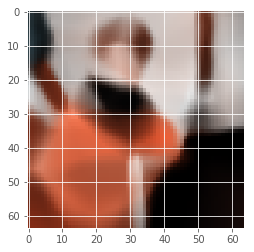

180 76.61
181 69.6874
182 68.5266
183 71.8135
184 78.3078
185 71.4643
186 68.7415
187 65.447
188 70.2974
189 65.8779
190 69.4386
191 73.1494
192 67.0114
193 69.9579
194 66.4359
195 73.9076
196 71.594
197 69.6117
198 66.4464
199 71.0049


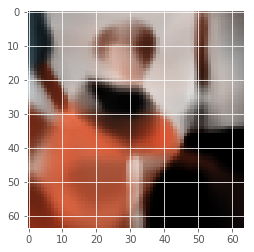

200 63.8917
201 66.4862
202 67.3736
203 68.9303
204 68.072
205 64.3134
206 72.418
207 69.4293
208 66.0495
209 76.6774
210 64.5499
211 62.3908
212 63.5341
213 67.6031
214 66.5275
215 64.1672
216 62.4054
217 64.9678
218 63.3281
219 60.8417


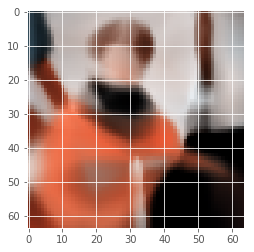

220 63.3105
221 63.2845
222 63.6243
223 61.5292
224 61.5828
225 63.0583
226 60.4691
227 65.2908
228 62.0203
229 64.915
230 63.7296
231 60.8176
232 59.6991
233 65.2939
234 62.3305
235 56.7117
236 58.9437
237 64.1378
238 60.0469
239 63.2301


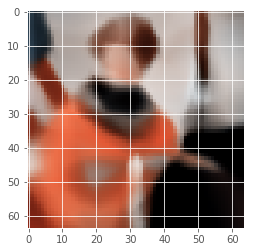

240 59.8705
241 64.1273
242 57.3948
243 57.0957
244 58.93
245 56.4355
246 59.6643
247 57.2817
248 56.9106
249 57.4393
250 54.5142
251 60.9095
252 59.7147
253 62.1185
254 65.0248
255 54.8408
256 67.2212
257 52.0337
258 57.2662
259 55.3239


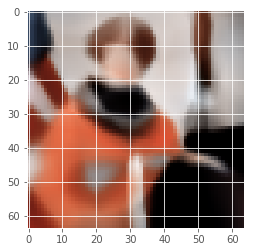

260 53.6369
261 58.5386
262 59.3882
263 57.4416
264 58.9098
265 55.2448
266 55.6983
267 57.6377
268 57.4917
269 54.1526
270 56.9806
271 56.6617
272 53.3503
273 55.3704
274 53.6836
275 56.994
276 52.4353
277 62.9365
278 56.4234
279 56.6587


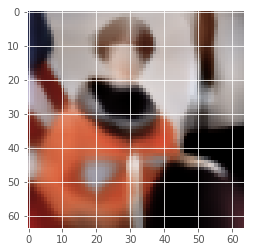

280 55.4381
281 56.8342
282 54.9385
283 53.0668
284 51.5403
285 54.8986
286 56.0671
287 49.4805
288 48.068
289 54.1567
290 54.4257
291 54.8472
292 52.3894
293 55.7944
294 58.3082
295 50.9783
296 54.4784
297 54.6535
298 55.1477
299 51.0755


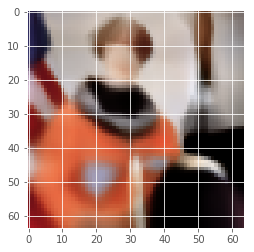

300 49.8534
301 51.0488
302 52.1581
303 51.8321
304 49.1515
305 55.091
306 46.5438
307 58.3152
308 48.8584
309 49.0682
310 50.1673
311 49.0359
312 55.6245
313 50.7668
314 60.3252
315 50.5355
316 48.065
317 51.0402
318 52.5758
319 56.926


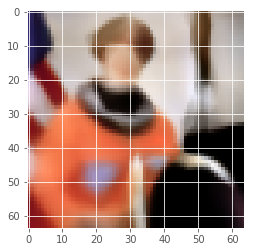

320 47.6627
321 43.1903
322 47.7835
323 49.5488
324 43.5053
325 52.933
326 51.5356
327 49.6051
328 52.2952
329 47.1561
330 56.1945
331 48.1765
332 46.5173
333 48.9731
334 52.1435
335 48.7183
336 51.0843
337 55.4496
338 46.9499
339 54.9102


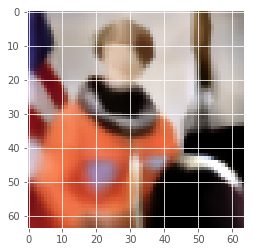

340 53.0354
341 48.126
342 47.5663
343 49.6042
344 49.0927
345 45.9431
346 48.707
347 47.7701
348 47.5895
349 47.615
350 48.0079
351 49.1066
352 47.0191
353 47.7124
354 46.4631
355 51.7779
356 45.6998
357 43.1263
358 47.9209
359 49.8559


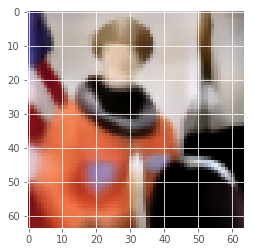

360 54.6821
361 50.9118
362 45.5886
363 45.0102
364 47.3822
365 48.6562
366 46.4264
367 44.6861
368 46.5608
369 50.6306
370 46.8332
371 46.6267
372 46.3453
373 49.8513
374 47.0526
375 46.039
376 42.6354
377 46.2359
378 51.6748
379 51.7876


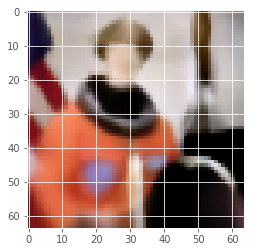

380 49.0797
381 59.0848
382 43.9772
383 44.8993
384 44.6441
385 45.513
386 40.6373
387 41.8117
388 47.8096
389 44.1899
390 46.3004
391 45.9499
392 43.1278
393 49.7446
394 44.4571
395 46.1073
396 46.2241
397 44.6406
398 45.5709
399 44.1558


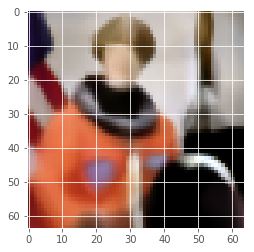

400 46.8859
401 42.4317
402 43.4934
403 43.0036
404 40.7784
405 37.8722
406 56.1709
407 46.3578
408 44.5647
409 41.7004
410 47.5322
411 45.1982
412 40.8184
413 45.9766
414 45.4478
415 40.3884
416 44.8673
417 44.2687
418 43.9388
419 49.2914


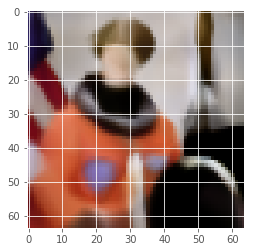

420 47.8388
421 45.2882
422 44.9506
423 41.9192
424 44.5616
425 43.8526
426 40.2303
427 50.0339
428 45.5074
429 39.6096
430 42.8337
431 46.4528
432 43.7593
433 40.7725
434 41.7798
435 38.6402
436 40.6129
437 41.5438
438 50.6501
439 43.9075


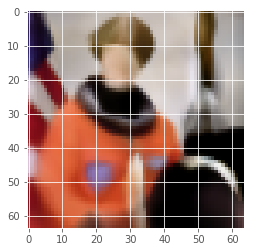

440 46.921
441 38.2001
442 45.4872
443 42.7992
444 41.6988
445 41.0258
446 47.312
447 42.5761
448 40.1564
449 48.6029
450 41.0603
451 41.6777
452 41.7375
453 48.9592
454 40.2353
455 41.0253
456 48.9014
457 39.8668
458 44.5644
459 47.3206


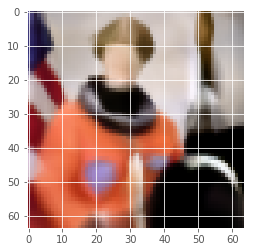

460 45.6274
461 40.2128
462 40.2936
463 46.5262
464 44.7938
465 44.1507
466 41.8016
467 42.8345
468 47.8965
469 43.9601
470 46.9451
471 39.2851
472 44.7853
473 44.7924
474 39.297
475 45.3508
476 44.2262
477 47.1512
478 39.2869
479 43.0976


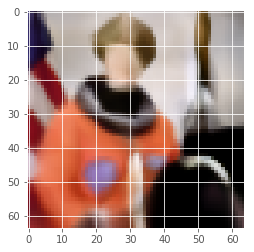

480 48.5593
481 40.3882
482 40.1281
483 42.3895
484 44.4693
485 43.2878
486 40.4247
487 43.8283
488 41.4164
489 41.9139
490 41.3465
491 49.4422
492 40.1196
493 42.81
494 43.3583
495 41.8453
496 42.3727
497 45.2773
498 41.7812
499 36.202


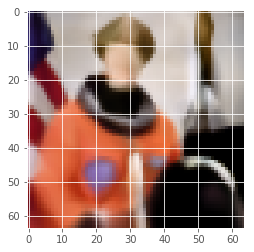

In [44]:
n_iterations = 500
batch_size = 50
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i +1)* batch_size]
            sess.run(optimizer, feed_dict={X :xs[idxs_i], Y:ys[idxs_i]})
        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        print(it_i, training_cost)
        
        if (it_i+1)%20 == 0:
            ys_pred = Y_pred.eval(feed_dict={X:xs}, session=sess)
            fig, ax = plt.subplots(1,1)
            img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
            plt.imshow(img)
            plt.show()